In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

## 加载MNIST数据

In [2]:
from sklearn.datasets import fetch_mldata
same_directory_data_path='./datasets'
parent_directory_data_path='../datasets'
mnist=fetch_mldata('MNIST original',data_home=parent_directory_data_path)
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
X,y=mnist['data'],mnist['target']
X.shape
y.shape

(70000, 784)

(70000,)

(-0.5, 27.5, 27.5, -0.5)

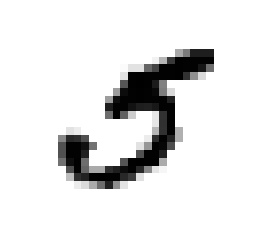

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit=X[36000]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')

创建__训练集__与__测试集__

In [5]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]
X_train.shape
y_train.shape

X_test.shape
y_test.shape

(60000, 784)

(60000,)

(10000, 784)

(10000,)

打乱__训练集__

In [6]:
import numpy as np

shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

In [ ]:
# 【api测试】permutation
import numpy as np
ary=np.arange(9)
aryd=np.arange(0,25,3)
ary3x3 = np.arange(9).reshape((3, 3))
per_index=np.random.permutation(3)
aryb=ary3x3[per_index]
aryc=(ary3x3[per_index])
ary
per_index
aryb
aryc
aryd

## 训练一个二分器

__简化问题__，只尝试去识别一个数字

为该分类任务创建目标向量

In [7]:
y_train_5=y_train==5
y_test_5=y_test==5

y_train_5
y_test_5

array([False, False, False, ..., False, False, False])

array([False, False, False, ..., False, False, False])

In [ ]:
# 【运算符测试】
aryb_5=ary==5
ary == aryd
result=sum(ary == aryd)
result

挑选一个分类器去训练它`SGDClassifter`
该分类器的好处
- 因为一次只处理一条数据
- 所以能够高效地处理非常大的数据集
- 适合在线学习

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

d:\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [9]:
# 预测
sgd_clf.predict([some_digit])

array([False])

## 对性能的评估

### 使用交叉验证测量准确性


实现自己版本的__交叉验证__，为了更多的控制权

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skflods=StratifiedKFold(n_splits=3,random_state=42)
for train_index,test_index in skflods.split(X_train,y_train_5):
#     第一步：克隆模型
    clone_clf=clone(sgd_clf)    
    
#     第二步：用训练集的训练分类来训练模型
    x_train_flods=X_train[train_index]
    y_train_flods=y_train_5[train_index]
    clone_clf.fit(x_train_flods,y_train_flods)
    
#     第三步：用模型预测测试集得到测试结果
    x_test_flod=X_train[test_index]
    y_pred=clone_clf.predict(x_test_flod)
    
#     第四步：将测试结果与测试分类进行对比，并算出性能
    y_test_flod=y_train_5[test_index] 
    n_correct=sum(y_pred==y_test_flod)
    print(n_correct/len(y_pred))

d:\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

0.9594


d:\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

0.96645


d:\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

0.96295


使用scikit-learn的`cross_val_score`来评估`SGDClassifier`模型

In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')


d:\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\python\python36\lib\site-packages\sklearn

array([0.9594 , 0.96645, 0.96295])

### 混淆矩阵
大体思路如下：
- 输出类别A被分类成类别B的次数
 - 例：为了知道分类器将5误分成3的次数，你需要查看混淆矩阵的第五行第三列
- 将一系列的__预测值__与__真实值__做比较
- 使用`cross_val_predict()`函数来进行模型预测

In [12]:
from sklearn.model_selection import cross_val_predict

y_train_predict=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
y_train_predict

d:\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
d:\python\python36\lib\site-packages\sklearn

array([False, False, False, ..., False, False, False])

使用`confusion_matrix()`函数，得到一个__混淆矩阵__

混淆矩阵中的每一行表示一个__实际的类__，每一列表示一个__预测的类__

该例为一个二分类，所以结果为一个2x2的矩阵
- 第一行认__非5__中的__53891__张被正确归类为__非5__，而其余__688__张被错误归类为__是5__类
- 第二行认为__是5__中的__1413__张被错误志归类为__非5__，其余__4008__张正确分类为__是5__类
- 第一个实际分类为__非5__，第一行表示，即为反例,N
- 第二个实际分类为__是5__，第二行表示，即为正例,P
- 第一个预测分类为__非5__，第一列表示，即为反例,N
- 第二个预测分类为__是5__，第二列表示，即为正例,P
- 反反为真反例，正正为真正例

$$\begin{bmatrix}实非5+预非5=归正确(TN)&实非5+预是5=归错误(FP)\\实是5+预非5=归错误(FN)&实是5+预是5=归正确(TP)\end{bmatrix}$$

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_predict)

array([[53956,   623],
       [ 1601,  3820]], dtype=int64)

混淆矩阵提供的信息__指标__
- 分类器的__准确率__(precision),也叫正例预测的__精度__
$$precision=\frac{TP}{TP+FP}(TP是真正例的数目，FP是假正例的数目)$$
- 召回率(recall),也叫敏感度(sensitivity)或者真正例率(true positive rate,简称TPR)
$$recall=\frac{TP}{TP+FN}(FN是假反例的数目)$$

以下为一个完美的分类器将只有真反例和真正例，

所以混淆矩阵的非零值仅在其主对角线（左上至右下）

In [17]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

### 准确率与召回率
计算分类器指标
- 准确率
- 召回率
- 不能同时拥有两者。增加准确率会降低召回率，反之亦然。这叫做准确率与召回率之间的折衷

数字5探测器性能
- 当它声明某张图片`是5`的时候，它有__86%__的可能性是正确的
- 而且，它只检测出`是5`类图片中的__70%__

In [24]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_train_5,y_train_predict)
recall_score(y_train_5,y_train_predict)

0.8597794283142021

0.7046670356022874

结合准确率和召回率的指标叫做__F1值__
- 它比较两个分类器的优劣
- 它是准确率和召回率的的__调和平均__
 - 普通平均，平等地看待所有的值
 - 调和平均，会给小的值更在的权重
- 一个高的__F1值__，需要召回率和准确率同时高 
$$F1=\frac{2}{\frac{1}{precision}+\frac{1}{recall}}=2*\frac{precision*recall}{precision+recall}=\frac{TP}{TP+\frac{FN+FP}{2}}$$


计算__F1值__

In [23]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_predict)

0.7745336577453366

应用场景：
- 关心准确率(高准确率)
 - 举例
   - 如果训练一他分类器去检测视频是否适合儿童，会倾向选择那种即便拒绝子很多好视频，但保证所保留的视频都是好的
- 关心召回率
 - 举例
   - 训练一个分类器去检测监控图像当中的窃贼，有着30%的准确率、99%的召回率是合适的(警卫会得到一些错误的报警，但几乎所有的窃贼都会被抓到)

### 准确率/召回率之间的折衷